# PHYS 267 - Assignment 5
###### Last Updated: February 12, 2023 by Dr. Brenda Lee
***

### Question 1

Use the dataset called A5_ErrorProvided.txt. You can assume that the x-values represent wavelength in nm, and the y-values represent absorbance. The goal is to load the data values into arrays and plot error bars. The error values are given already from the instrumentation, so you do not have to calculate the error yourself.
1. Load your data values for x, y, and y_error [2 marks]
2. Plot a detailed and labelled graph of this data. Make sure you plot the data points as dots, connect the dots using a line plot, and then plot the error bars with visible cap sizes. Make sure your figure size is large enough to view the majority of error bars. [8 marks]

Total Marks: 10

#### Solution

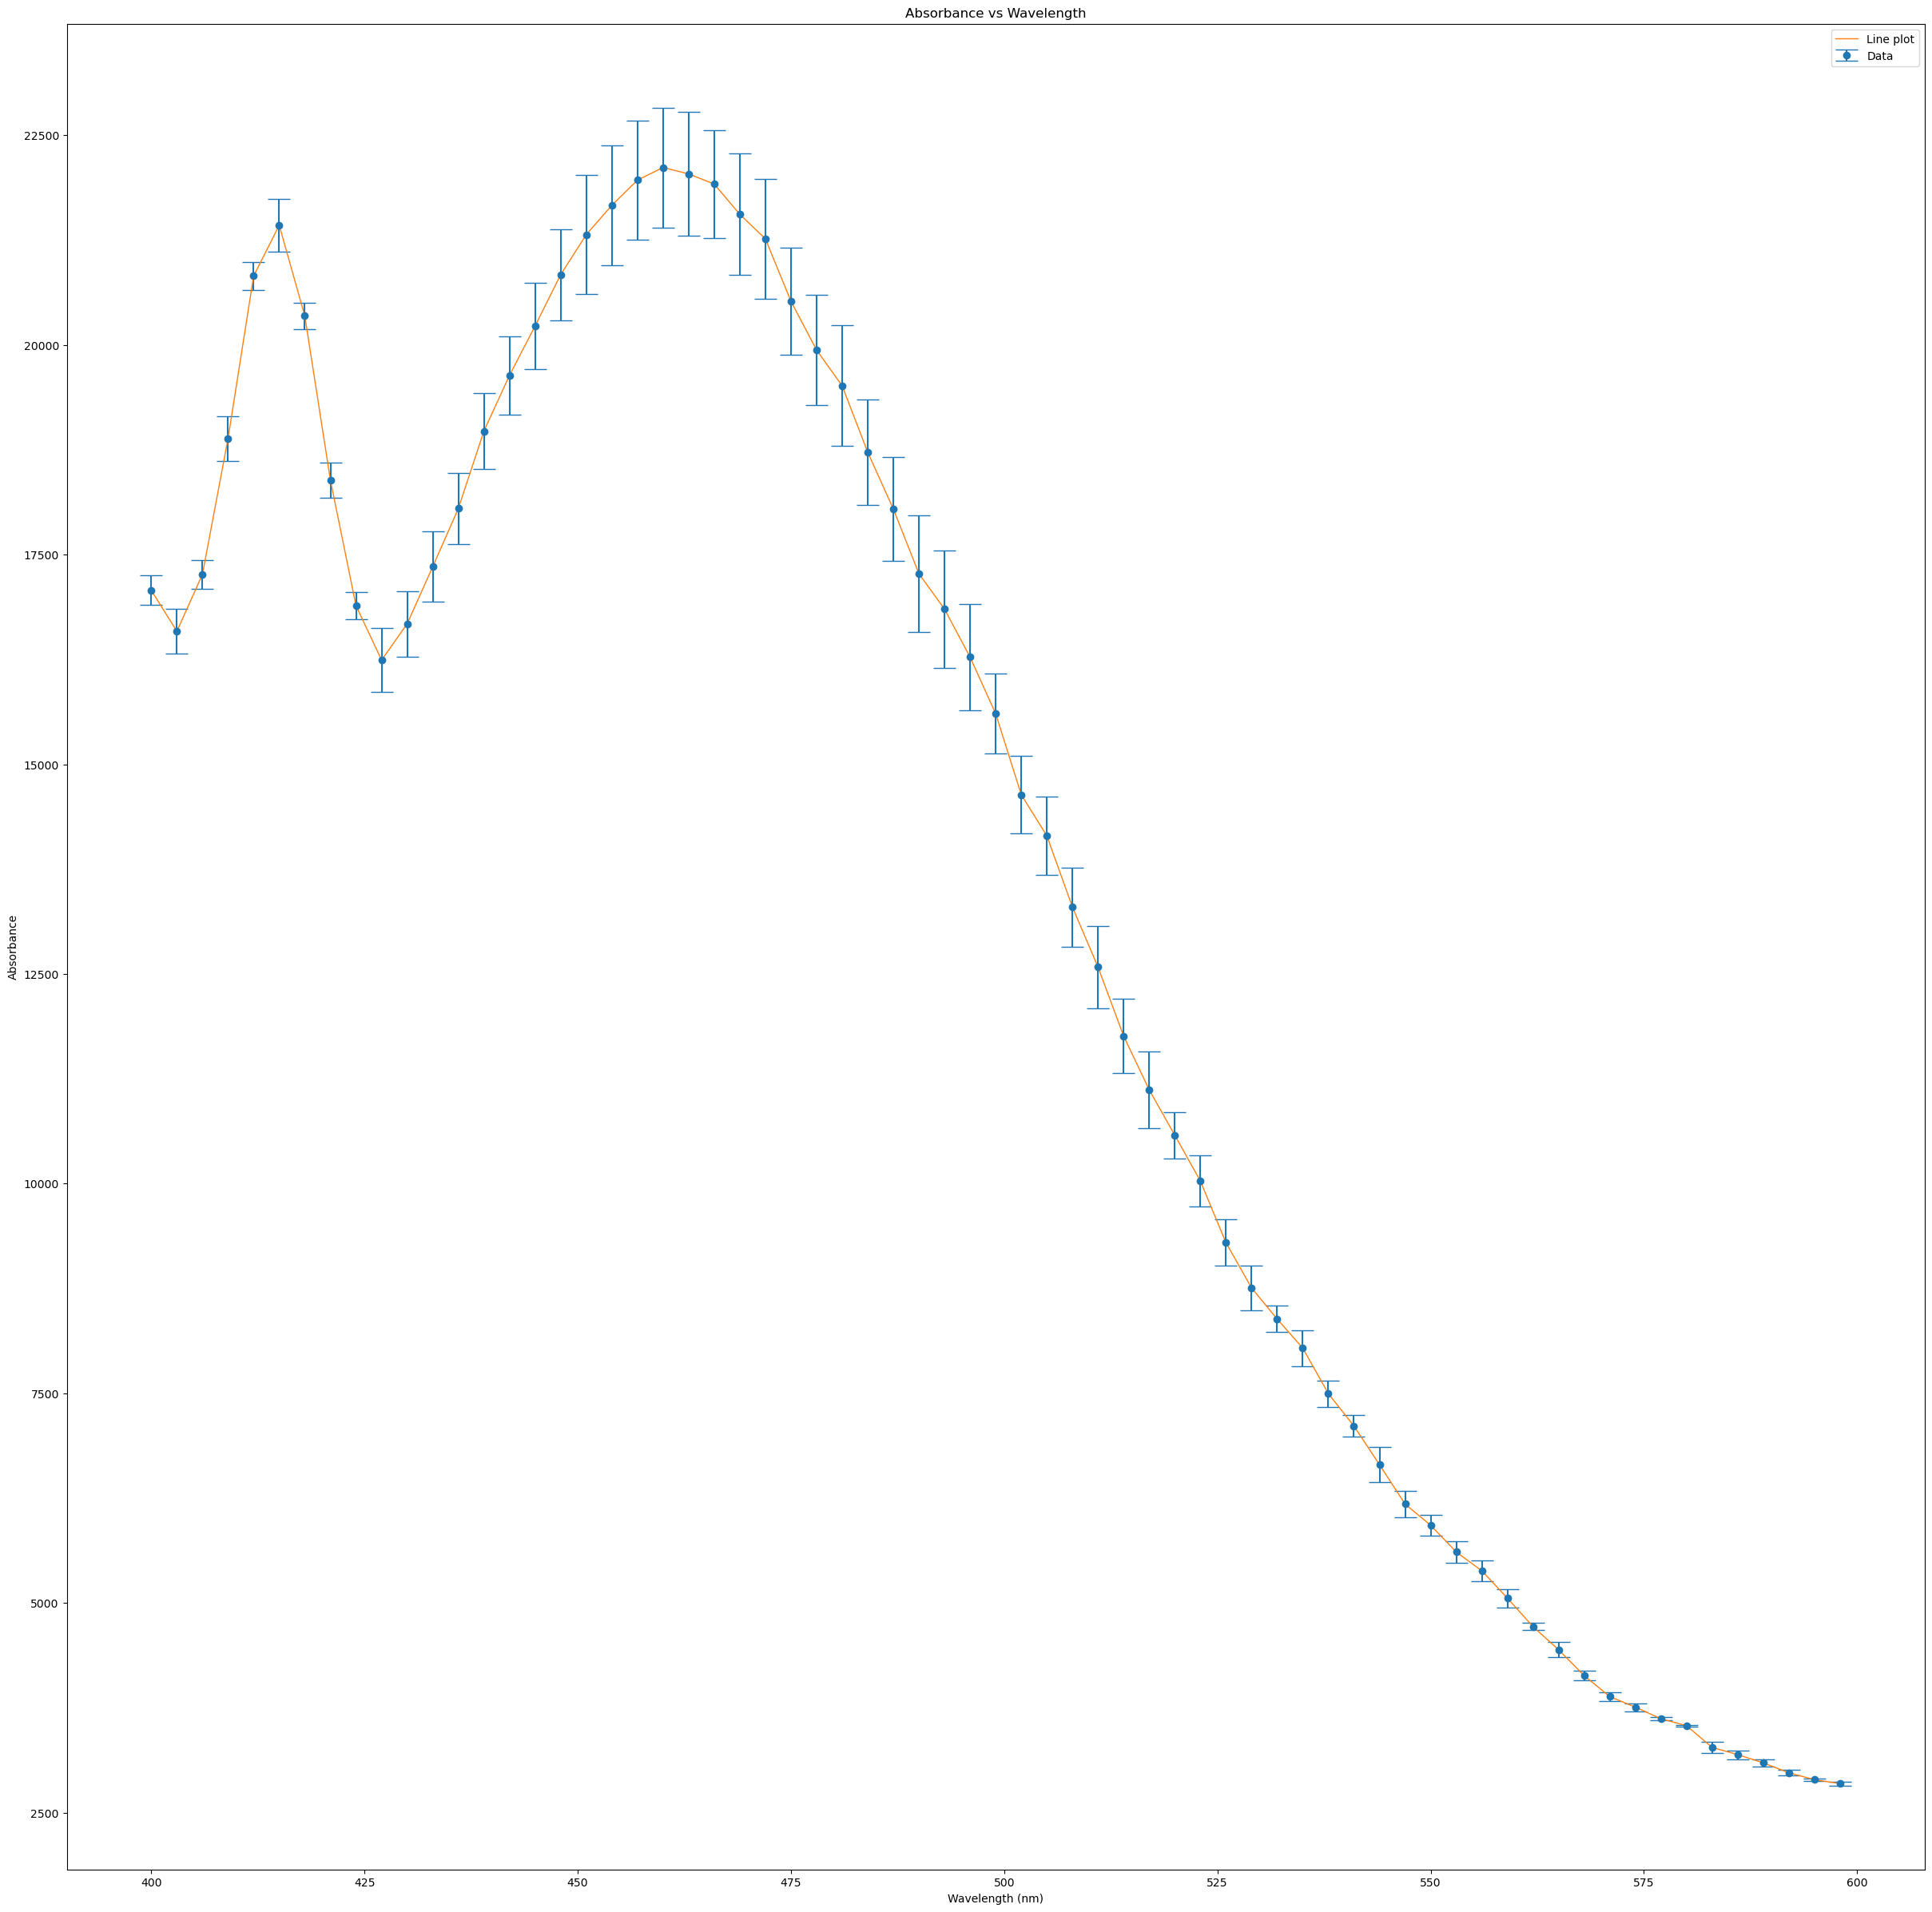

In [18]:
# Parts 1 + 2
import numpy as np
import matplotlib.pyplot as plt

# Loading data
data = np.loadtxt('A5_ErrorProvided.txt',skiprows= 1)
x = data[:, 0]
y = data[:, 1]
y_error = data[:, 2]

# Plotting with error bars
fig, ax = plt.subplots(figsize=(30,30)) #larger size allows for better viewing of error bars
ax.errorbar(x, y, yerr=y_error, fmt='o', capsize=10, label='Data') 
ax.plot(x, y, '-', linewidth=1, label='Line plot')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance')
ax.set_title('Absorbance vs Wavelength')
ax.legend()
plt.show()


### Question 2

Use the dataset called A5_MissingError.txt. The x-values and y-values represent the same quantities as in Question 1. The goal is to generate error values for this dataset and plot error bars.

1. Load your data values for x, y1, y2, and y3. These 3 y-values represent repeat measurements for each x-value. There are essentially three trials that were performed. Take care in importing your values (some columns are redundant) [5 marks]
2. Create arrays and print/report the mean, standard deviation and standard error for each y-value. There are three trials performed, so for each x-value, take the average of the y-values and generate a list of means, STD's, and SE's [6 marks]
3. Using values from #2, plot your data points and error bars [5 marks]

Total Marks: 16

#### Solution

In [19]:
# Part 1 - Load Values
data = np.loadtxt('A5_MissingError.txt', skiprows=1)
x1 = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 3]
y3 = data[:, 5]



In [20]:
# Part 2 - Mean / Standard Deviation / Standard Error
from scipy import stats
y1_mean = np.mean(y1)
y1_std = np.std(y1)
y1_se = np.std(y1) / np.sqrt(len(y1))

y2_mean = np.mean(y2)
y2_std = np.std(y2)
y2_se = np.std(y2) / np.sqrt(len(y2))

y3_mean = np.mean(y3)
y3_std = np.std(y3)
y3_se = np.std(y3) / np.sqrt(len(y3))

#the following code will generate a list for individual x values
x_values = np.unique(x1)
mean_values = []
std_values = []
se_values = []

for xval in x_values:
    y_vals = np.array([y1[i] for i in range(len(x1)) if x1[i] == xval] +
                      [y2[i] for i in range(len(x1)) if x1[i] == xval] +
                      [y3[i] for i in range(len(x1)) if x1[i] == xval])
    mean_values.append(np.mean(y_vals))
    std_values.append(np.std(y_vals))
    se_values.append(np.std(y_vals) / np.sqrt(len(y_vals)))

print("y1: mean = ",y1_mean, "std =", y1_std," se = ",y1_se)
print("y2: mean = ",y2_mean, "std =", y2_std," se = ",y2_se)
print("y3: mean = ",y3_mean, "std =", y3_std," se = ",y3_se)
#print(x_values, mean_values, std_values, se_values)






y1: mean =  14969.21567164179 std = 7672.807696190688  se =  937.3826528963987
y2: mean =  16209.246268656716 std = 8385.402222896688  se =  1024.439930275415
y3: mean =  18131.068358208955 std = 9277.228789240311  se =  1133.393886347807


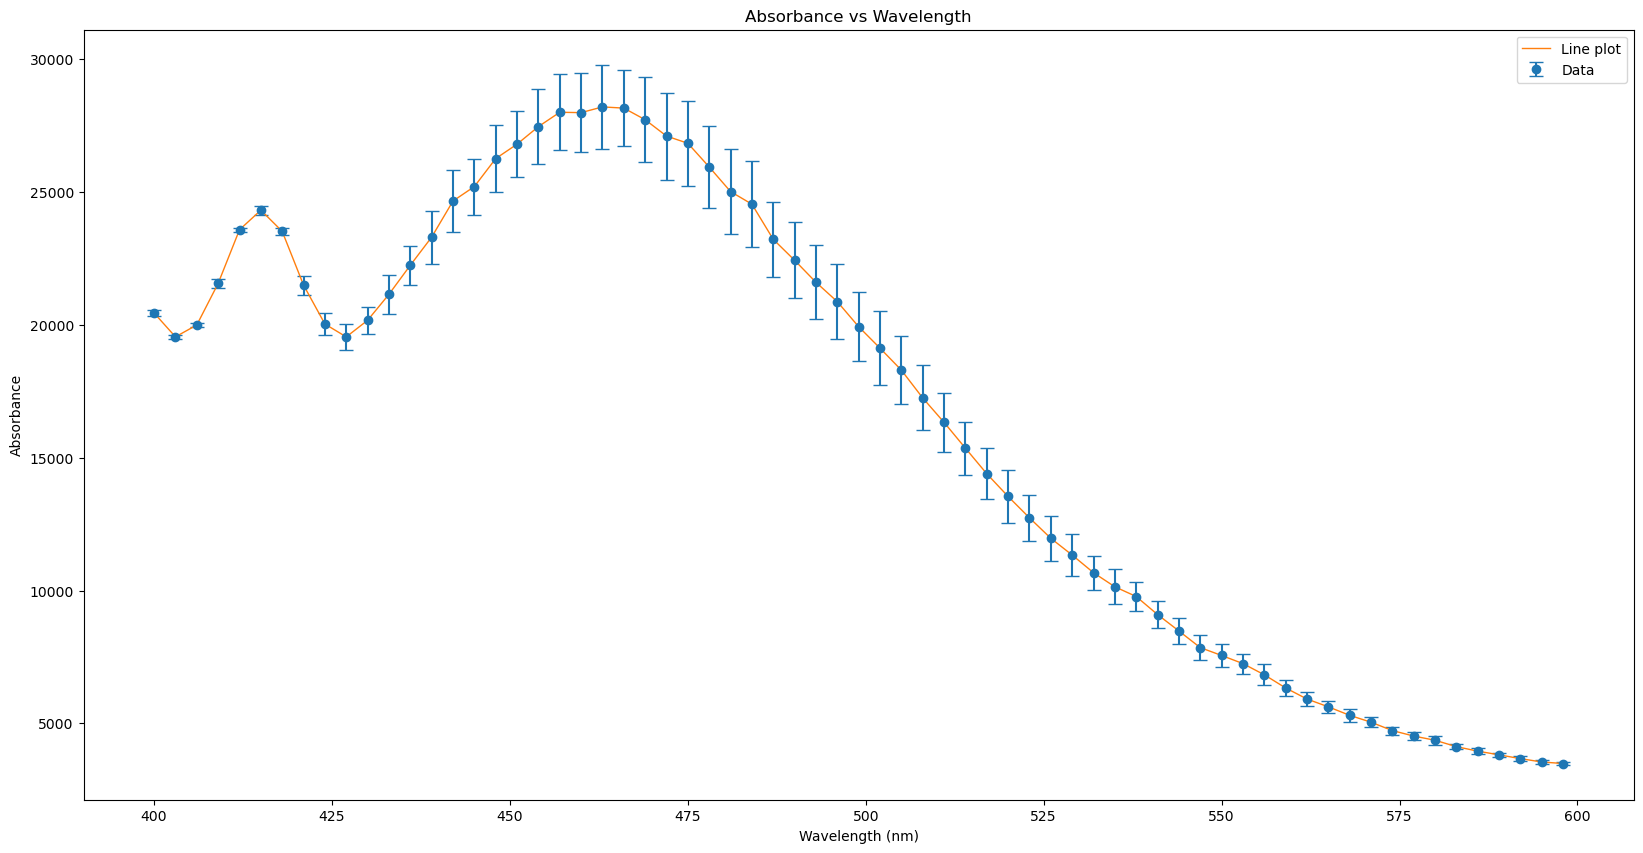

In [21]:
# Part 3 - Plot Data Points and Error


fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.errorbar(x_values, mean_values, yerr=se_values, fmt='o', capsize=5, label='Data')
ax1.plot(x_values,mean_values,'-', linewidth=1, label='Line plot')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Absorbance')
ax1.set_title('Absorbance vs Wavelength')
ax1.legend()
plt.show()

### Question 3

Using Python code, calculate the uncertainty for each of the following Physics equations. You are given the following values:
- $v = 3.6 \text{m/s} \pm 0.5$
- $v_0 = 5.2 \text{m/s} \pm 0.2$
- $t = 1.2 \text{m/s} \pm 0.3$
- $d = 200 \text{m/s} \pm 12.5$
- $g = 9.8 \text{m/s}^2$ (no uncertainty)


1. Find the uncertainty in $v$ when $v = v_0 -gt$ [4 marks]
2. Find the uncertainty in $d$ when $d = 0.5(v_0+v)t$ [4 marks]
3. Find the uncertainty in $v$ when $v^2 = v_0^2 -2gd$ [4 marks]

Total Marks: 12 marks

#### Solution

I will assume RHS of the equations are the values that need to be used
Also asuuming the vlaues are correct but units in the question are wrong. will assume d is in m, t is in s

In [22]:
# All values with their absolute uncertainty in the form of [value, absolute uncertainty]
v = [3.6,0.5]       # velocity v
v0 = [5.2,0.2]      # initial velocity v0
t = [1.2,0.3]       # time t
d = [200, 12.5]     # distance d
g = 9.8             # constant g
g3 = -9.8             # constant g, negative for correctness for q3
# Relative Uncertainties for all vlaues mentioned
rv = v[1]/v[0]        # velocity v
rv0 = v0[1]/v0[0]     # initial velocity v0
rt = t[1]/t[0]        # time t
rd = d[1]/d[0]        # distance d


In [23]:
# Part 1 - Find Uncertainty in v
uncertainty_V = np.sqrt((rt*g*t[0])**2+v0[1]**2) 
# error porpagation is simple here taking addition properties after accounting for abslute uncertainty changes after constant multiplications
print("Velocity =",v0[0]-g*t[0],"±",uncertainty_V, "m/s")

Velocity = -6.56 ± 2.9467948690059846 m/s


In [24]:
# Part 2 - Find Uncertainty in d
# d = 0.5(v0+v)t
d2 = 0.5*(v0[0]+v[0])*t[0]
uncertainty_d = np.sqrt((np.sqrt(v0[1]**2+v[1]**2)/(v0[0]+v[0]))**2+rt**2)*d2
# similar as part 1 in terms of error propagation

print("Distance =", d2,"±",uncertainty_d,"m" )


Distance = 5.28 ± 1.3589701983487348 m


In [25]:
# Part 3 - Find Uncertainty in v Using an Alternative Equation
# v^2 = v0^2-2gd
v2= np.sqrt(abs(v0[0]**2-2*g*d[0]))
# absolute value is being considered here to avoid complex domain
uncertainty_v2 = (np.sqrt((rv0*2*v0[0]**2)**2+(rd*2*g*d[0])**2)/abs(v0[0]**2-2*g*d[0])*0.5)*v2
# unlike 1 and 2 this is slightly more involved. 
# 1st the inner subtraction was taken care of using addition/subt properties and constant multiplication and exponential
# 2nd relative uncertainty for v^2 was found
# 3rd from the relative uncertainty exponential rule was applied again for v and then multiplied by v (v2 here) to get back absolute uncertainty 
print("velocity is:", v2, "±", uncertainty_v2, "m/s")

#alternatively if we don't want to use absolute value  we could do the following
import cmath

v3 = cmath.sqrt((v0[0]**2-2*g*d[0]))
uncertainty_v3 = (np.sqrt((rv0*2*v0[0]**2)**2+(rd*2*g*d[0])**2)/abs(v0[0]**2-2*g*d[0])*0.5)*v3

print("velocity is:", v3, "±", uncertainty_v3, "m/s")

# we could also take g to be negative but not much is given about the situation or orientaiton of the axis/frame, 
# this does not have a major effect on the uncertainty of other answers 1 and 2 but it will affect the other true value.
v4 = cmath.sqrt((v0[0]**2-2*g3*d[0]))
uncertainty_v4 = (np.sqrt((rv0*2*v0[0]**2)**2+(rd*2*g3*d[0])**2)/abs(v0[0]**2-2*g3*d[0])*0.5)*v4
print("velocity is:", v4, "±", uncertainty_v4, "m/s")


velocity is: 62.393589414298006 ± 1.9634134814859436 m/s
velocity is: 62.393589414298006j ± 1.9634134814859436j m/s
velocity is: (62.825472541000444+0j) ± (1.949916326286029+0j) m/s
